In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import cv2 as cv
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator



import os
import warnings
warnings.filterwarnings('ignore')

###  Explore data


In [2]:
Class_name=os.listdir("../input/emotion-detection-fer/train")
Class_name

['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

                         ********************************disgusted*************************


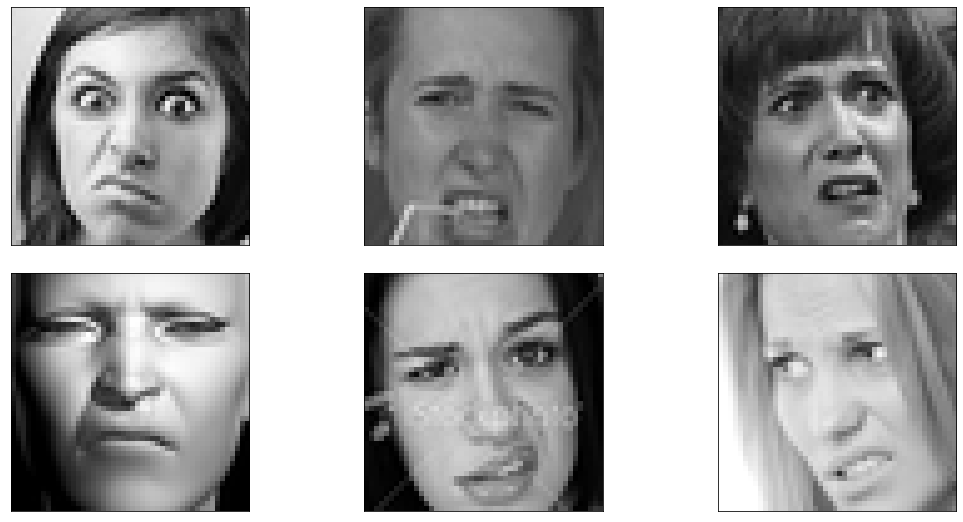

In [3]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,11))
path = f"../input/emotion-detection-fer/train/{Class_name[1]}"
print(f"                         ********************************{Class_name[1]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

                         ********************************angry*************************


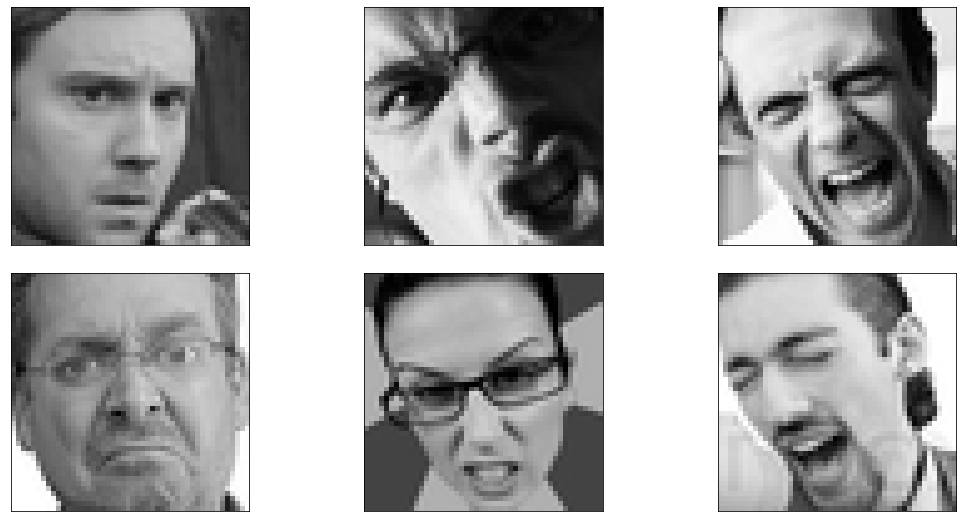

In [4]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,11))
path = f"../input/emotion-detection-fer/train/{Class_name[2]}"
print(f"                         ********************************{Class_name[2]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

                         ********************************neutral*************************


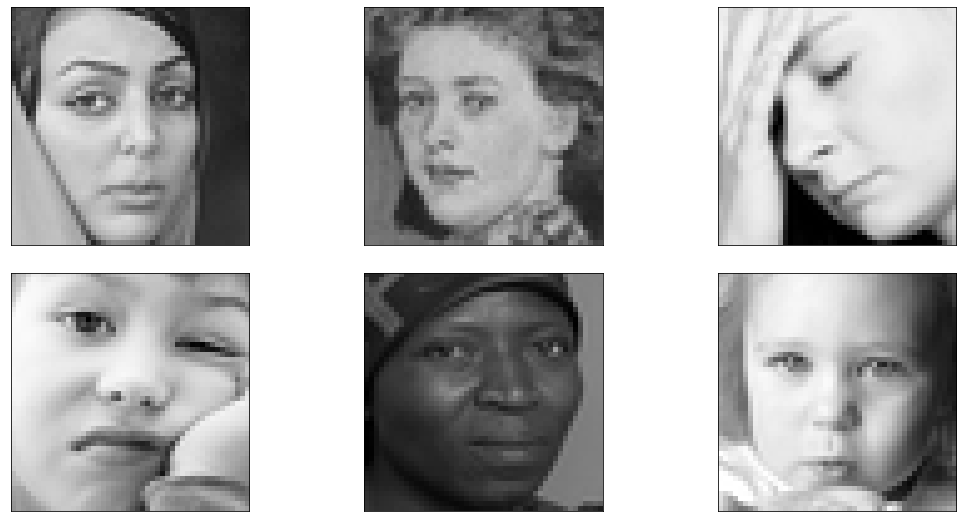

In [5]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,11))
path = f"../input/emotion-detection-fer/train/{Class_name[3]}"
print(f"                         ********************************{Class_name[3]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

                         ********************************sad*************************


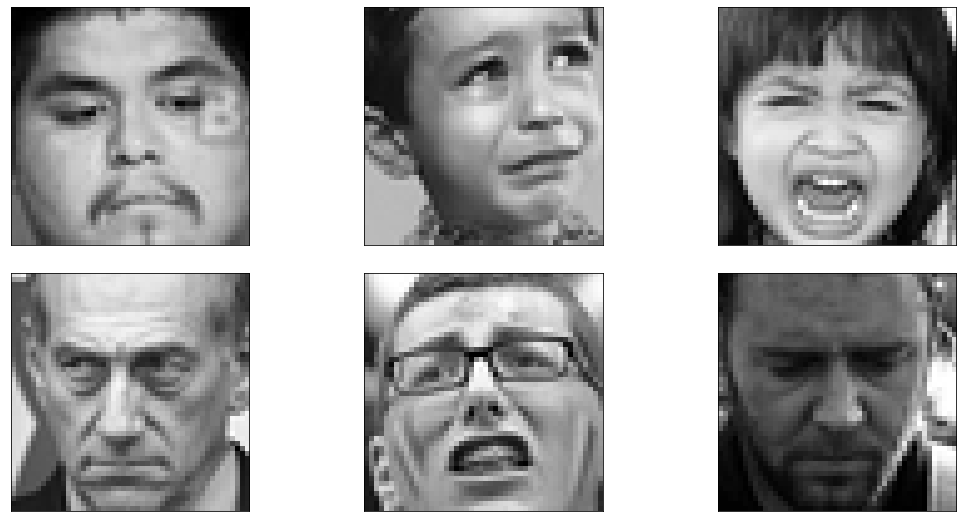

In [6]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,11))
path = f"../input/emotion-detection-fer/train/{Class_name[4]}"
print(f"                         ********************************{Class_name[4]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

                         ********************************surprised*************************


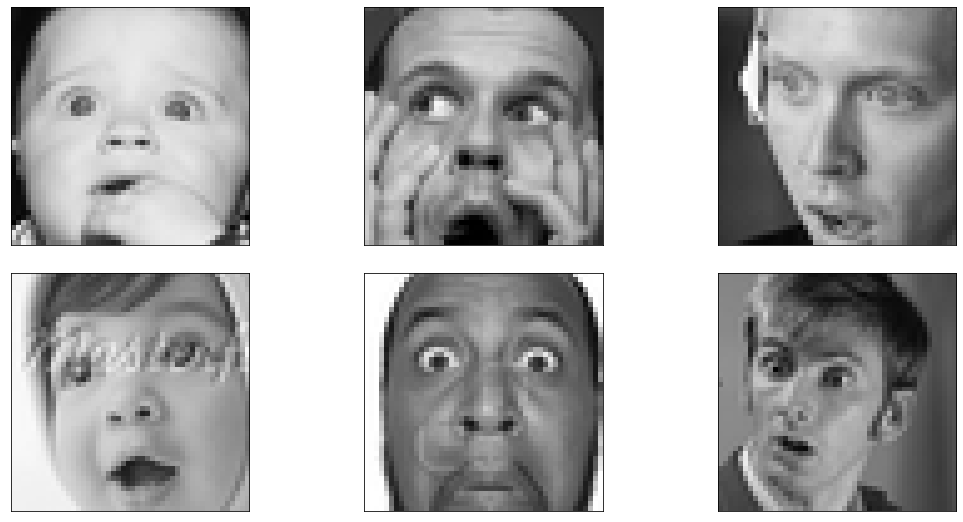

In [7]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,11))
path = f"../input/emotion-detection-fer/train/{Class_name[5]}"
print(f"                         ********************************{Class_name[5]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

                         ********************************happy*************************


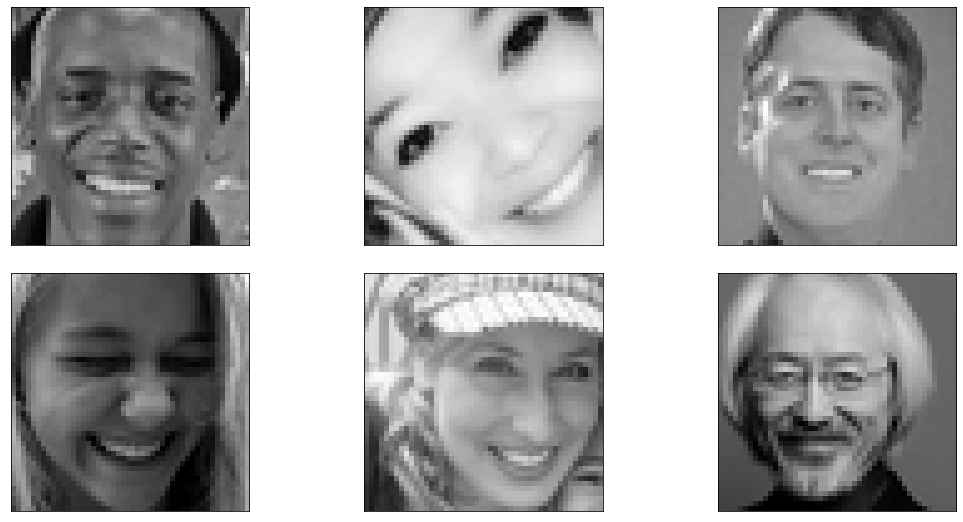

In [8]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,11))
path = f"../input/emotion-detection-fer/train/{Class_name[6]}"
print(f"                         ********************************{Class_name[6]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

###  distribition of training data before "data augmentation"


<BarContainer object of 7 artists>

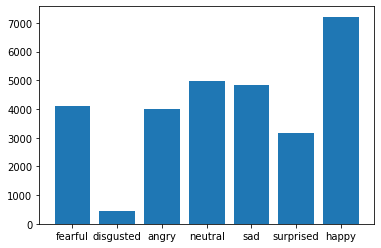

In [9]:
train_count=[]
for i in Class_name:
    train_count.append(len(os.listdir("../input/emotion-detection-fer/train/"+i+"/")))
plt.bar(Class_name,train_count)

### generat more data

In [10]:
train_datagen = ImageDataGenerator(
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        
                                        )
test_datagen = ImageDataGenerator(rescale = 1./255,
                                        )
train_generator = train_datagen.flow_from_directory(directory = "../input/emotion-detection-fer/train",
                                                    target_size = (48,48),
                                                    batch_size = 32,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical"
                                                   )
test_generator = test_datagen.flow_from_directory( directory = "../input/emotion-detection-fer/test",
                                                              target_size = (48,48),
                                                              batch_size = 32,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                             )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### model architecture

In [19]:
CNN= Sequential()
CNN.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
CNN.add(Conv2D(64,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(128,(3,3),padding='same',activation='relu'))
CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Flatten()) 

CNN.add(Dense(100,activation = 'relu'))

CNN.add(Dense(50,activation = 'relu'))

CNN.add(Dense(225,activation = 'relu'))

CNN.add(BatchNormalization())
CNN.add(Dropout(0.25))

CNN.add(Dense(7, activation='softmax'))

In [20]:
CNN.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 256)      

In [21]:
CNN.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.0005), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [22]:
history = CNN.fit(
    train_generator ,
    epochs=50,
    batch_size=32)

2022-10-12 15:12:10.126303: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-10-12 15:12:12.351223: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


898/898 [==============================] - 195s 208ms/step - loss: 1.8784 - accuracy: 0.2663
Epoch 2/50
898/898 [==============================] - 39s 44ms/step - loss: 1.5847 - accuracy: 0.3839
Epoch 3/50
898/898 [==============================] - 39s 44ms/step - loss: 1.4149 - accuracy: 0.4608
Epoch 4/50
898/898 [==============================] - 39s 43ms/step - loss: 1.3296 - accuracy: 0.4949
Epoch 5/50
898/898 [==============================] - 41s 45ms/step - loss: 1.2643 - accuracy: 0.5215
Epoch 6/50
898/898 [==============================] - 40s 45ms/step - loss: 1.2185 - accuracy: 0.5399
Epoch 7/50
898/898 [==============================] - 40s 44ms/step - loss: 1.1819 - accuracy: 0.5506
Epoch 8/50
898/898 [==============================] - 39s 44ms/step - loss: 1.1573 - accuracy: 0.5658
Epoch 9/50
898/898 [==============================] - 39s 43ms/step - loss: 1.1354 - accuracy: 0.5722
Epoch 10/50
898/898 [==============================] - 39s 43ms/step - loss: 1.1129 - accur

In [23]:
CNN.evaluate(test_generator)

225/225 [==============================] - 45s 202ms/step - loss: 0.9767 - accuracy: 0.6609


[0.9766895174980164, 0.6609083414077759]

### ACC and Loss  VS Number of Epochs


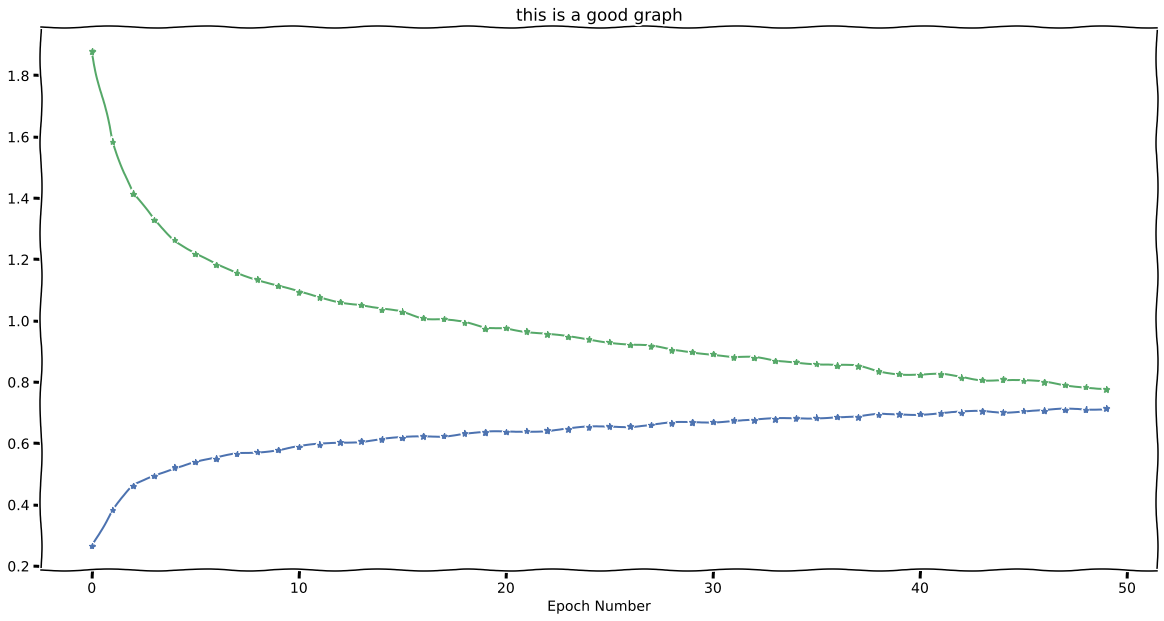

In [24]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

plt.xkcd()
plt.style.use('seaborn-deep')

plt.rcParams["figure.figsize"] = (20, 10) 

plt.plot(history.history['accuracy'],marker="*",label="Acc Value")
plt.plot(history.history['loss'],marker="*",label="loss Value")
plt.grid(True)

plt.title("this is a good graph")
plt.xlabel("Epoch Number")
plt.ylabel("")

plt.show()

### save model

In [ ]:
CNN.save("My_model.h5")
